In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('salary_data.xlsx')
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [3]:
data = data.set_index('order')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167278 entries, 1 to 167361
Data columns (total 25 columns):
CASE_NUMBER                       167278 non-null object
CASE_STATUS                       167278 non-null object
CASE_RECEIVED_DATE                167278 non-null object
DECISION_DATE                     167278 non-null object
EMPLOYER_NAME                     167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null object
JOB_TITLE                         167278 non-null object
WORK_CITY                         167275 non-null object
EDUCATION_LEVEL_REQUIRED          11093 non-null object
COLLEGE_MAJOR_REQUIRED            11051 non-null object
EXPERIENCE_REQUIRED_Y_N           11093 non-null object
EXPERIENCE_REQUIRED_NUM_MONTHS    4965 non-null float64
COUNTRY_OF_CITIZENSHIP            11

In [5]:
data.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,EXPERIENCE_REQUIRED_NUM_MONTHS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR
count,1.672780e+05,1.672780e+05,4965.000000,167210.000000,1.672780e+05
mean,7.115752e+04,8.164186e+04,34.692044,74274.868236,8.553277e+04
std,3.874624e+04,4.147703e+04,22.317783,25356.245893,3.873847e+04
min,5.050000e+00,5.050000e+00,0.000000,10504.000000,1.050000e+04
25%,5.447500e+04,6.100000e+04,12.000000,56880.000000,6.300000e+04
50%,6.970100e+04,7.700000e+04,24.000000,70928.000000,7.860000e+04
75%,8.993700e+04,1.000000e+05,60.000000,90459.000000,1.000060e+05
max,6.217100e+06,2.500000e+06,144.000000,320000.000000,2.500000e+06


In [6]:
data.isnull().sum()

CASE_NUMBER                            0
CASE_STATUS                            0
CASE_RECEIVED_DATE                     0
DECISION_DATE                          0
EMPLOYER_NAME                          0
PREVAILING_WAGE_SUBMITTED              0
PREVAILING_WAGE_SUBMITTED_UNIT         0
PAID_WAGE_SUBMITTED                    0
PAID_WAGE_SUBMITTED_UNIT               0
JOB_TITLE                              0
WORK_CITY                              3
EDUCATION_LEVEL_REQUIRED          156185
COLLEGE_MAJOR_REQUIRED            156227
EXPERIENCE_REQUIRED_Y_N           156185
EXPERIENCE_REQUIRED_NUM_MONTHS    162313
COUNTRY_OF_CITIZENSHIP            156185
PREVAILING_WAGE_SOC_CODE               0
PREVAILING_WAGE_SOC_TITLE              0
WORK_STATE                             0
WORK_POSTAL_CODE                  113604
FULL_TIME_POSITION_Y_N             11093
VISA_CLASS                             0
PREVAILING_WAGE_PER_YEAR              68
PAID_WAGE_PER_YEAR                     0
JOB_TITLE_SUBGRO

In [7]:
data.describe(include=['O'])

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,JOB_TITLE_SUBGROUP
count,167278,167278,167278,167278,167278,167278,167278,167278,167275,11093,11051,11093,11093,167278,167278,167278,53674,156185,167278,167278
unique,167278,5,1769,874,23773,5,5,12589,4888,7,3261,2,134,410,561,110,6332,2,5,8
top,I-200-15069-563102,certified,3/17/2015,3/18/2015,GOOGLE INC.,year,year,SOFTWARE ENGINEER,NEW YORK,Master's,computer science,n,INDIA,15-1132,"Software Developers, Applications",CA,94043,y,H-1B,software engineer
freq,1,140031,1225,2202,6213,158413,158428,54478,6714,5550,1521,6139,6587,73136,52066,42677,2034,152594,154497,99364


In [8]:
data['JOB_TITLE'] = data['JOB_TITLE'].str.lower()
data['JOB_TITLE'].nunique()

11904

In [9]:
data['JOB_TITLE'].unique().tolist()

['software engineer',
 'assistant professor of marketing',
 'special education teacher',
 'science teacher',
 'senior software engineer',
 'oracle scm analyst/business analyst',
 'sr. software engineer',
 'sr. business analyst',
 'protocol software engineer',
 'software engineer, test engineering',
 'business analyst applications',
 'service management consultant',
 'it business analyst',
 'data analyst senior',
 'assistant professor',
 'language arts teacher',
 'business analyst',
 'elementary school teacher',
 'software engineer & tester',
 'assistant professor of counseling',
 'assistant professor - criminal justice',
 'secondary school teacher',
 'visting assistant professor',
 'high school special education teacher',
 'assistant professor of finance',
 'visiting assistant professor',
 'chinese immersion elementary classroom teacher',
 'middle school teacher',
 'music teacher',
 'kindergarten teacher',
 'group teacher',
 'middle school math teacher',
 'computer science teacher',
 '

In [10]:
data['JOB'] = data['JOB_TITLE'].str.extract('.*((?:assistant professor|attorney|business analyst|data analyst|data scientist|management consultant|software engineer|teacher)).*')
data['JOB'].isnull().sum()

0

In [11]:
data = data.drop(['JOB_TITLE','JOB_TITLE_SUBGROUP'],axis = 1)
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,WORK_CITY,...,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB
order,,,,,,,,,,,,,,,,,,,,,
1,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,BLOOMINGTON,...,NaN,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.0,software engineer
2,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,SAN FRANCISCO,...,IRAN,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132.0,NaN,greencard,NaN,91440.0,assistant professor
3,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,LOS ANGELES,...,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.0,teacher
4,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,HARLINGEN CISD,...,NaN,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.0,teacher
5,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,PORTLAND,...,NaN,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer


<IPython.core.display.Javascript object>


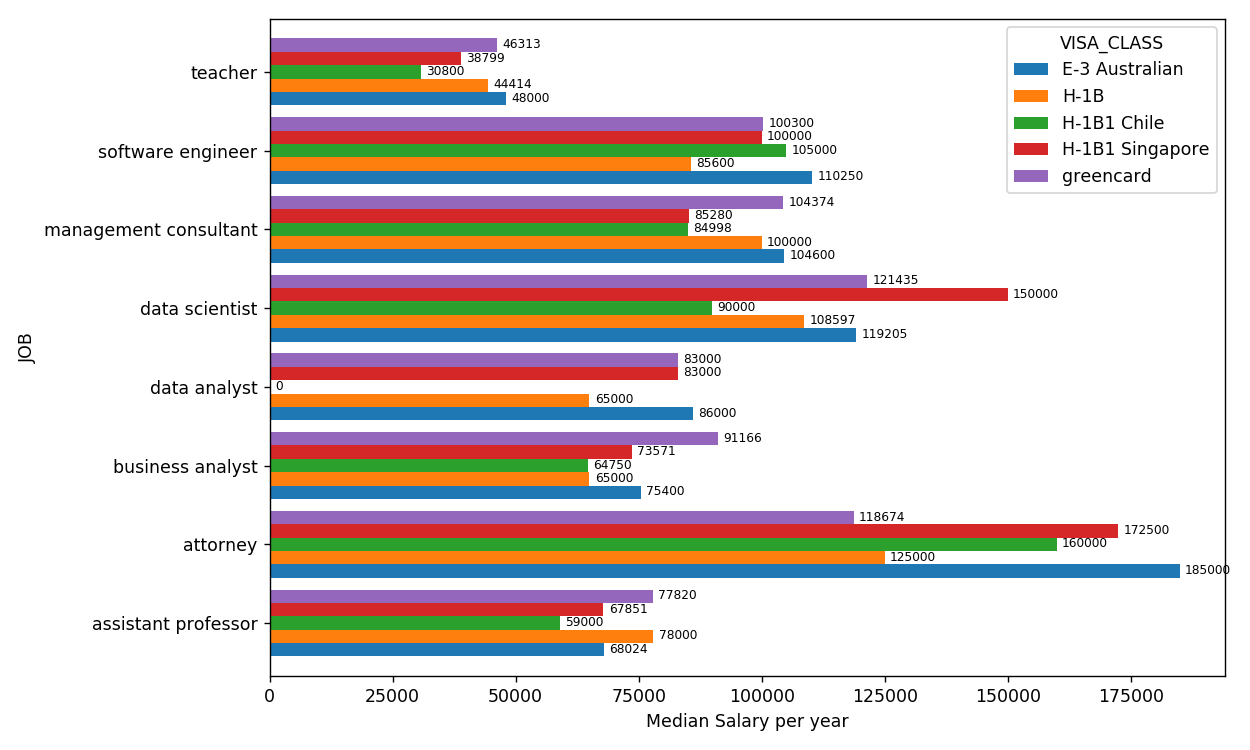

In [12]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
pt = pd.pivot_table(data = data, values = 'PAID_WAGE_PER_YEAR',index = 'JOB', columns = 'VISA_CLASS', aggfunc = 'median')
ax = pt.plot(kind = 'barh', linewidth = 0, figsize=(10,6),width = 0.85)
ax.set_xlabel('Median Salary per year')
for rect in ax.patches:
    width = int(rect.get_width())
    ax.annotate('{}'.format(width),
                    xy=(width,rect.get_y() + rect.get_height() / 2),
                    xytext=(3,0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize = 7)

In [13]:
data['CASE_RECEIVED_DATE'] = pd.to_datetime(data['CASE_RECEIVED_DATE'])
data['YEAR'] = data['CASE_RECEIVED_DATE'].dt.year

In [14]:
data = data.drop('CASE_RECEIVED_DATE', axis = 1)

<IPython.core.display.Javascript object>


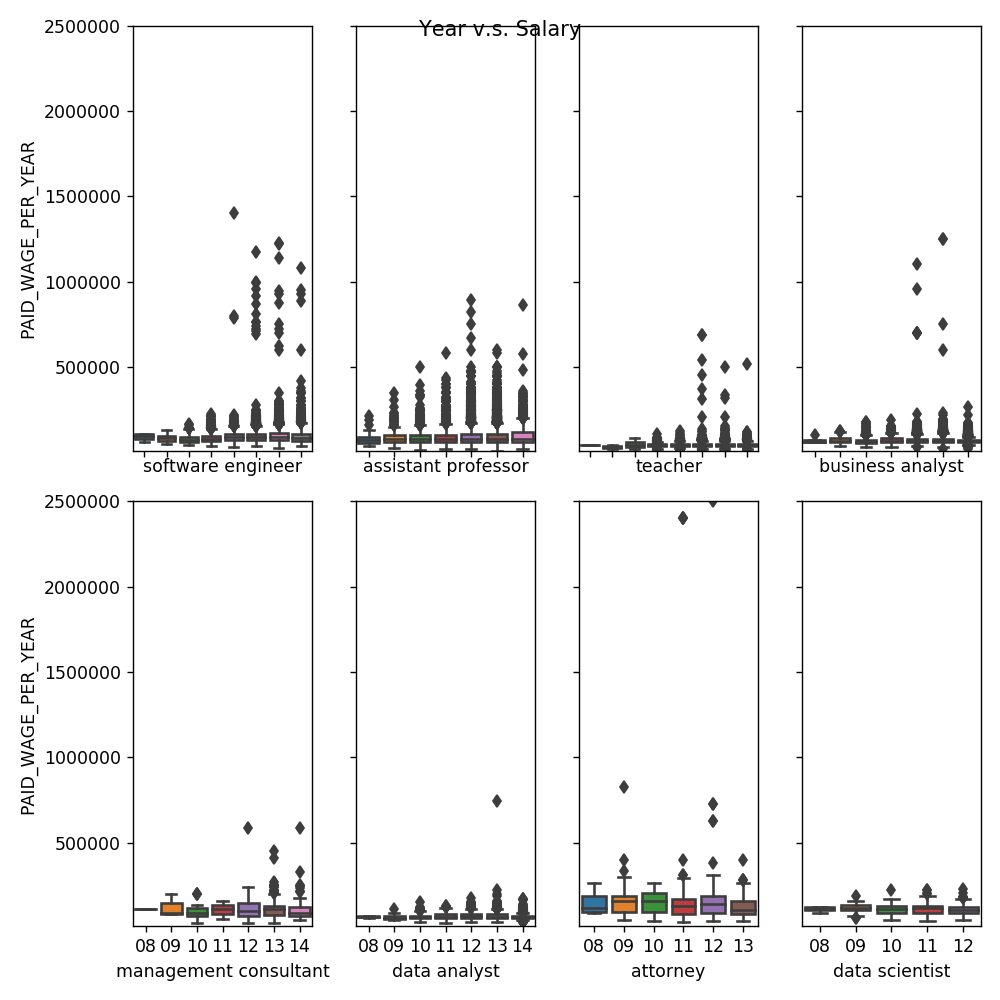

In [15]:
import seaborn as sns
titles = data['JOB'].unique().tolist()
fig = plt.figure(figsize=(8,8))
fig.suptitle("Year v.s. Salary")
years = ["08","09","10","11","12","13","14","15"]
for title in titles:
    i = titles.index(title)
    ax = fig.add_subplot(2,4,i+1)
    ax.axis([2008,2015,10000,2500000])
    df = data[data['JOB']==title].copy()
    sns.boxplot(x='YEAR',y='PAID_WAGE_PER_YEAR', data=df, ax =ax)
    ax.set_xlabel(title)
    if i != 0 and i != 4:
        plt.setp(ax.get_yticklabels(),visible = False)
        ax.set_ylabel("")
    if i<4:
        plt.setp(ax.get_xticklabels(),visible = False)
    else:
        ax.set_xticklabels(years)

In [16]:
data[data['PAID_WAGE_PER_YEAR']>1500000]

,CASE_NUMBER,CASE_STATUS,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,WORK_CITY,EDUCATION_LEVEL_REQUIRED,...,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB,YEAR
order,,,,,,,,,,,,,,,,,,,,,
161,I-200-13081-043757,certified,4/3/2013,HUGHES HUBBARD & REED LLP,207106.0,year,2400000.0,year,NEW YORK,NaN,...,23-1011,Lawyers,NY,NaN,y,H-1B,207106.0,2400000.0,attorney,2013
233,I-203-14021-228428,withdrawn,2/5/2014,WINSTON & STRAWN LLP,192379.0,year,2500000.0,year,WASHINGTON DC,NaN,...,23-1011,Lawyers,DC,NaN,y,E-3 Australian,192379.0,2500000.0,attorney,2014
267,I-200-13077-839340,denied,3/22/2013,HUGHES HUBBARD & REED LLP,188053.0,year,2400000.0,year,WASHINGTON,NaN,...,23-1011,Lawyers,DC,NaN,y,H-1B,188053.0,2400000.0,attorney,2013
268,I-200-13081-136705,denied,3/28/2013,HUGHES HUBBARD & REED LLP,188053.0,year,2400000.0,year,DISTRICT OF COLUMBIA,NaN,...,23-1011,Lawyers,DC,NaN,y,H-1B,188053.0,2400000.0,attorney,2013
269,I-200-13087-022976,certified,4/3/2013,HUGHES HUBBARD & REED LLP,188053.0,year,2400000.0,year,"WASHINGTON, D.C",NaN,...,23-1011,Lawyers,DC,NaN,y,H-1B,188053.0,2400000.0,attorney,2013


<IPython.core.display.Javascript object>


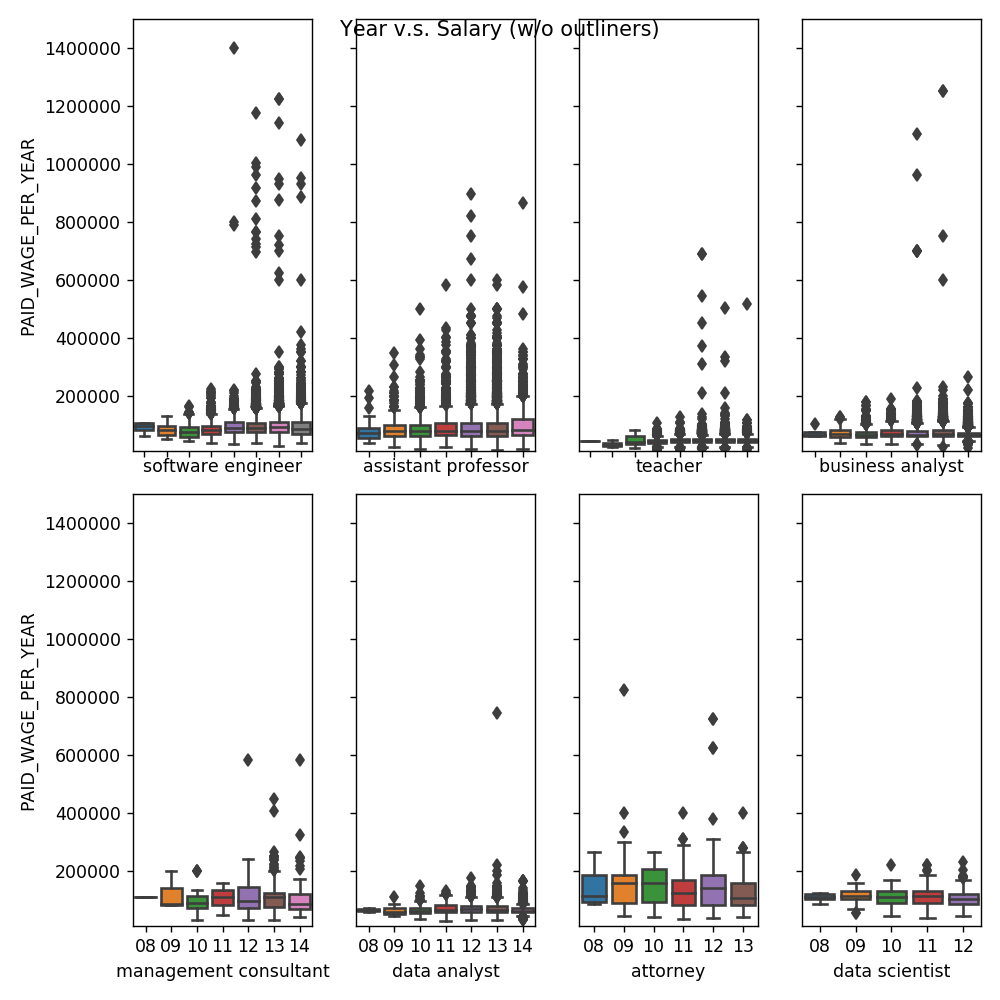

In [17]:
titles = data['JOB'].unique().tolist()
fig = plt.figure(figsize=(8,8))
fig.suptitle("Year v.s. Salary (w/o outliners)")
years = ["08","09","10","11","12","13","14","15"]
for title in titles:
    i = titles.index(title)
    ax = fig.add_subplot(2,4,i+1)
    ax.axis([2008,2015,10000,1500000])
    df = data[data['JOB']==title].copy()
    df = df[df['PAID_WAGE_PER_YEAR']<=1500000]
    sns.boxplot(x='YEAR',y='PAID_WAGE_PER_YEAR', data=df, ax =ax)
    ax.set_xlabel(title)
    if i != 0 and i != 4:
        plt.setp(ax.get_yticklabels(),visible = False)
        ax.set_ylabel("")
    if i<4:
        plt.setp(ax.get_xticklabels(),visible = False)
    else:
        ax.set_xticklabels(years)

<IPython.core.display.Javascript object>


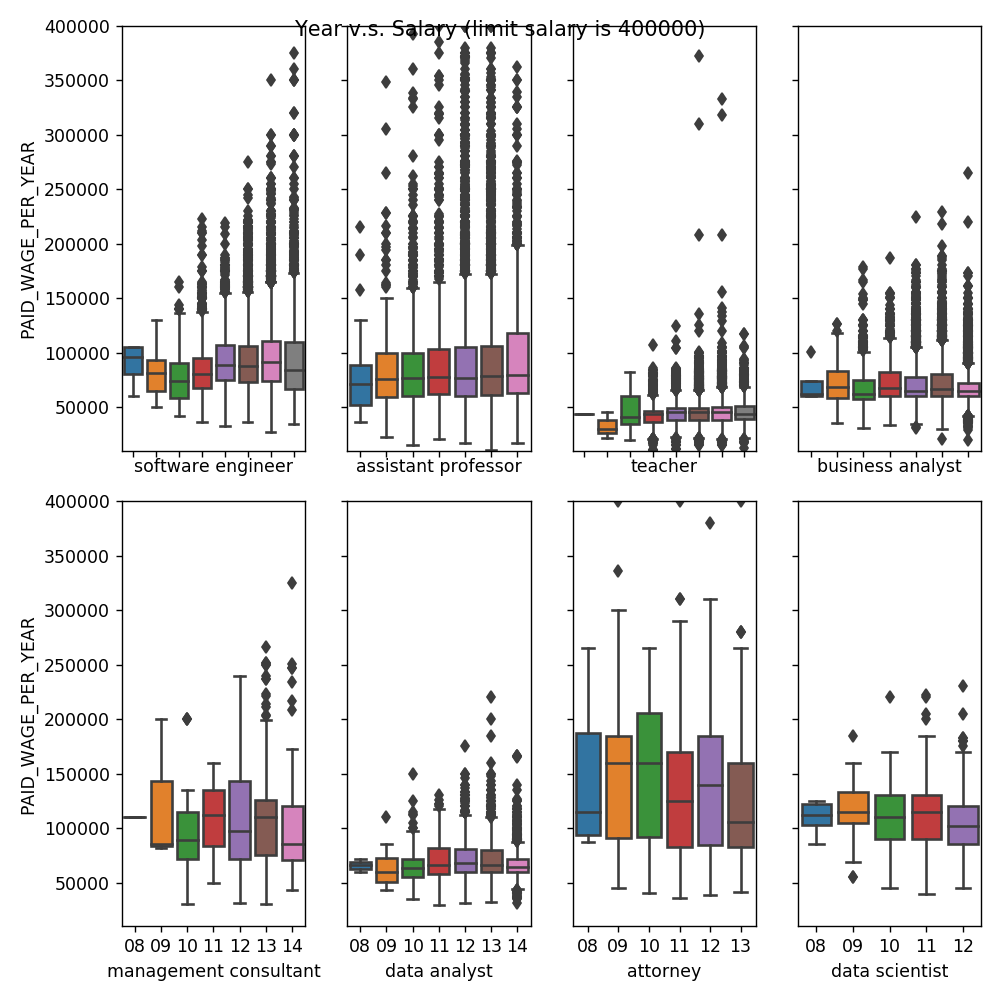

In [18]:
titles = data['JOB'].unique().tolist()
fig = plt.figure(figsize=(8,8))
fig.suptitle("Year v.s. Salary (limit salary is 400000)")
years = ["08","09","10","11","12","13","14","15"]
for title in titles:
    i = titles.index(title)
    ax = fig.add_subplot(2,4,i+1)
    ax.axis([2008,2015,10000,400000])
    df = data[data['JOB']==title].copy()
    df = df[df['PAID_WAGE_PER_YEAR']<=1500000]
    sns.boxplot(x='YEAR',y='PAID_WAGE_PER_YEAR', data=df, ax =ax)
    ax.set_xlabel(title)
    if i != 0 and i != 4:
        plt.setp(ax.get_yticklabels(),visible = False)
        ax.set_ylabel("")
    if i<4:
        plt.setp(ax.get_xticklabels(),visible = False)
    else:
        ax.set_xticklabels(years)

In [19]:
dfif = data.copy()
dfif.dropna(subset=['PREVAILING_WAGE_PER_YEAR'], inplace = True)

In [20]:
dfif['DIFF'] = dfif['PREVAILING_WAGE_PER_YEAR'] - dfif['PAID_WAGE_PER_YEAR']

<IPython.core.display.Javascript object>


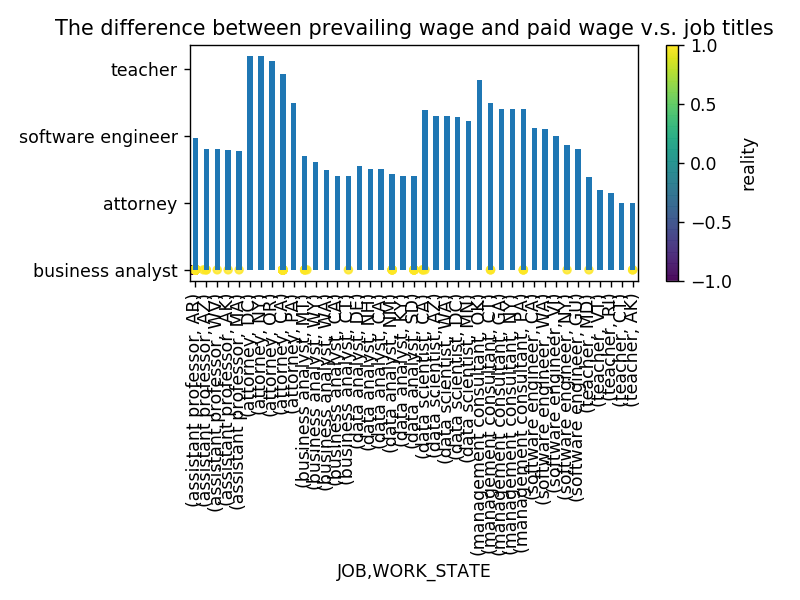

Text(0.5, 1.0, 'The difference between prevailing wage and paid wage v.s. job titles')

In [21]:
dfif['reality'] = 1
dfif.loc[dfif['DIFF']<0,'reality'] =-1
job = dfif['JOB'].unique().tolist()
num = list(range(len(job)))
jobnum = dict(zip(job,num))
dfif['JOB'] = dfif['JOB'].map(jobnum).astype(int)
ax = dfif.plot.scatter('DIFF','JOB', c='reality', colormap='viridis', alpha = 0.8)
ax.invert_xaxis()
ax.set_yticklabels(job)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("The difference between prevailing wage and paid wage v.s. job titles")

In [22]:
data[data['WORK_STATE'].str.len()>2]['WORK_STATE'].sort_values().unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'GUAM', 'HAWAII', 'IDAHO', 'ILLINOIS',
       'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGIN ISLANDS', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA',
       'WISCONSIN', 'WYOMING'], dtype=object)

In [23]:
statelist = pd.read_html('https://state.1keydata.com/state-abbreviations.php')

In [24]:
statelist

[                         0
 0  State Abbreviation List,
                                                    0
 0  This page lists the state abbreviations for th...,
                 0             1               2             3
 0            Name  Abbreviation            Name  Abbreviation
 1         Alabama            AL         Montana            MT
 2          Alaska            AK        Nebraska            NE
 3         Arizona            AZ          Nevada            NV
 4        Arkansas            AR   New Hampshire            NH
 5      California            CA      New Jersey            NJ
 6        Colorado            CO      New Mexico            NM
 7     Connecticut            CT        New York            NY
 8        Delaware            DE  North Carolina            NC
 9         Florida            FL    North Dakota            ND
 10        Georgia            GA            Ohio            OH
 11         Hawaii            HI        Oklahoma            OK
 12          Id

In [66]:
df = statelist[2]
df_1 = df.drop([2,3],axis = 1).copy()
df_1 = df_1.rename(columns = df_1.loc[0,:])
df_1 = df_1.set_index('Name')
df_1 = df_1.drop(['Name'],axis=0)
df_2 = df.drop([1,0],axis = 1).copy()
df_2 = df_2.rename(columns = df_2.loc[0,:])
df_2 = df_2.set_index('Name')
df_2 = df_2.drop(['Name'],axis=0)
df = df_1.append(df_2)
df.index = df.index.str.upper()
bref = df.to_dict()['Abbreviation']
bref.update({'DISTRICT OF COLUMBIA':'DC','GUAM':'GU', 'VIRGIN ISLANDS':'VI','PUERTO RICO':'PR'})

In [149]:
dataname = data.copy()
dataname['bref'] = dataname[dataname['WORK_STATE'].str.len()>2]['WORK_STATE'].map(bref)
dataname.loc[~dataname['bref'].isnull(),'WORK_STATE'] = dataname['bref']
dataname = dataname.drop(['bref'],axis = 1)

In [201]:
datafive = dataname.pivot_table(values = 'PAID_WAGE_PER_YEAR', index = ['JOB', 'WORK_STATE'], aggfunc = 'median')
datafive = datafive.reset_index()

In [216]:
df = datafive[datafive['JOB']=='data analyst']
parity = pd.read_excel('price_parity.xlsx')
parity.State = parity.State.str.upper()
parity.State = parity.State.map(bref)

,State,Price Parity
0,AL,87.7
1,AK,106.0
2,AZ,97.1
3,AR,87.5
4,CA,112.3


In [221]:
df = pd.merge(df,parity,how='inner',left_index=True, right_index=False,left_on='WORK_STATE',right_on='State')

In [222]:
df['Adjusted'] = df['PAID_WAGE_PER_YEAR']/df['Price Parity']*100

<IPython.core.display.Javascript object>


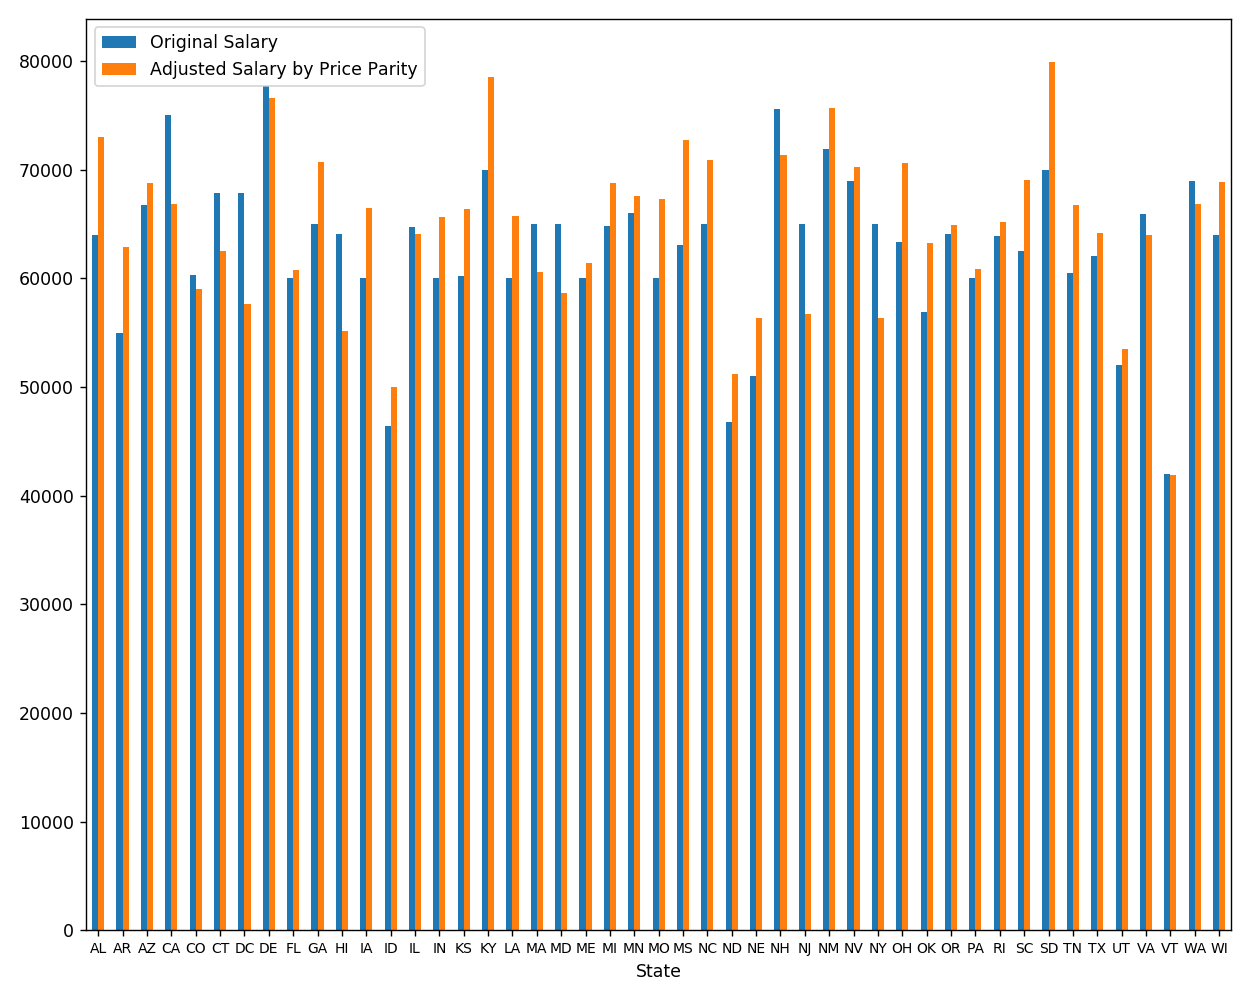

In [233]:
ax = df.plot(x='State',y=['PAID_WAGE_PER_YEAR','Adjusted'],kind='bar', figsize=(10,8), rot = 0)
plt.tick_params(axis='x', labelsize=8)
ax.legend(['Original Salary','Adjusted Salary by Price Parity'])

In [258]:
df = data.copy()
df.dropna(subset=['EDUCATION_LEVEL_REQUIRED'], inplace = True)
ct = pd.crosstab(df['JOB'],df['EDUCATION_LEVEL_REQUIRED'],colnames=['EDUCATION']).apply(lambda r: r/r.sum()*100, axis=1)

EDUCATION,Associate's,Bachelor's,Doctorate,High School,Master's,None,Other
JOB,,,,,,,
assistant professor,0.000000,0.000000,79.600887,0.000000,4.582409,0.000000,15.816704
attorney,0.000000,1.351351,5.405405,0.000000,12.162162,0.000000,81.081081
business analyst,0.361882,43.425814,0.241255,0.120627,54.644150,0.723764,0.482509
data analyst,0.000000,39.200000,0.000000,0.000000,60.800000,0.000000,0.000000
data scientist,0.000000,11.764706,21.568627,0.000000,66.666667,0.000000,0.000000
management consultant,0.000000,31.578947,5.263158,5.263158,57.894737,0.000000,0.000000
software engineer,0.215654,37.193962,1.027528,0.012686,61.004694,0.241025,0.304453
teacher,0.131752,76.943347,0.658762,0.527009,12.648221,0.658762,8.432148


<IPython.core.display.Javascript object>


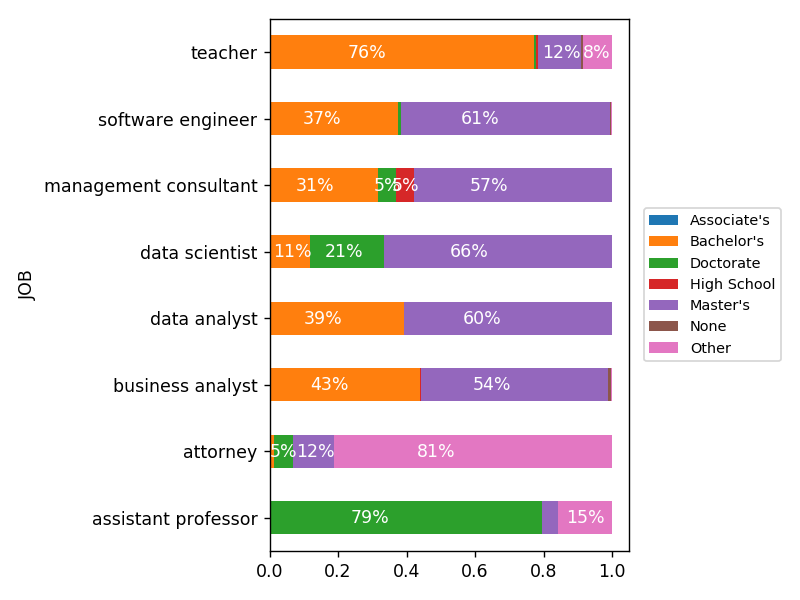

In [335]:
ax = ct.plot.barh(stacked = True)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, fontsize='small')
for i,rec in enumerate(ax.patches):
    if int(rec.get_width()*100)>=5:
        ax.text(rec.get_xy()[0]+rec.get_width()/3-0.03,rec.get_xy()[1]+rec.get_height()/3,str(int(rec.get_width()*100))+"%",fontsize=10, color='w')